In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pickle
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv("2.loan_approval.CSV")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## VISUALIZATIONS

d:\python\python386\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python\python386\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

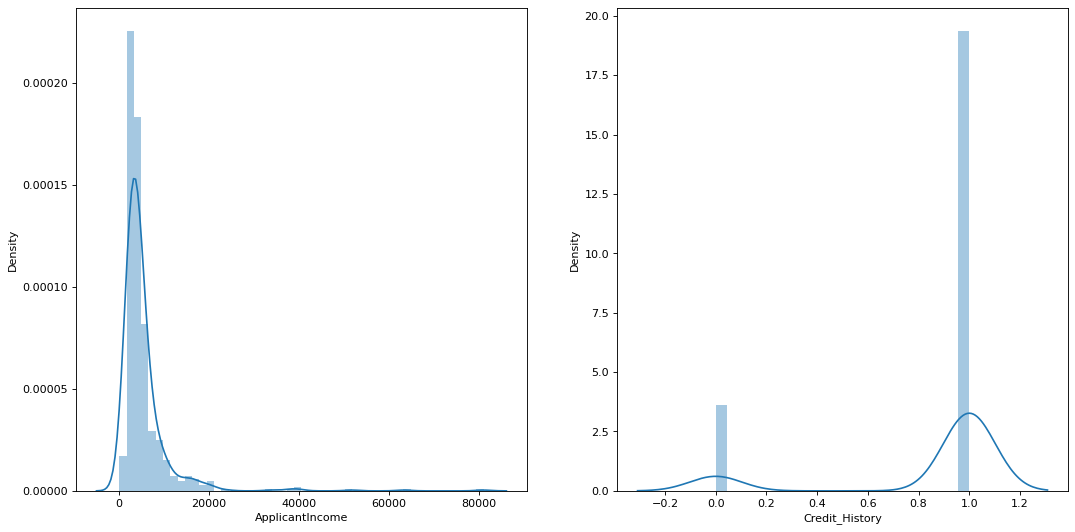

In [4]:
plt.figure(figsize=(16, 8), dpi=80)
plt.subplot(1, 2, 1)
sns.distplot(data['ApplicantIncome'])
plt.subplot(1, 2, 2)
sns.distplot(data['Credit_History'])

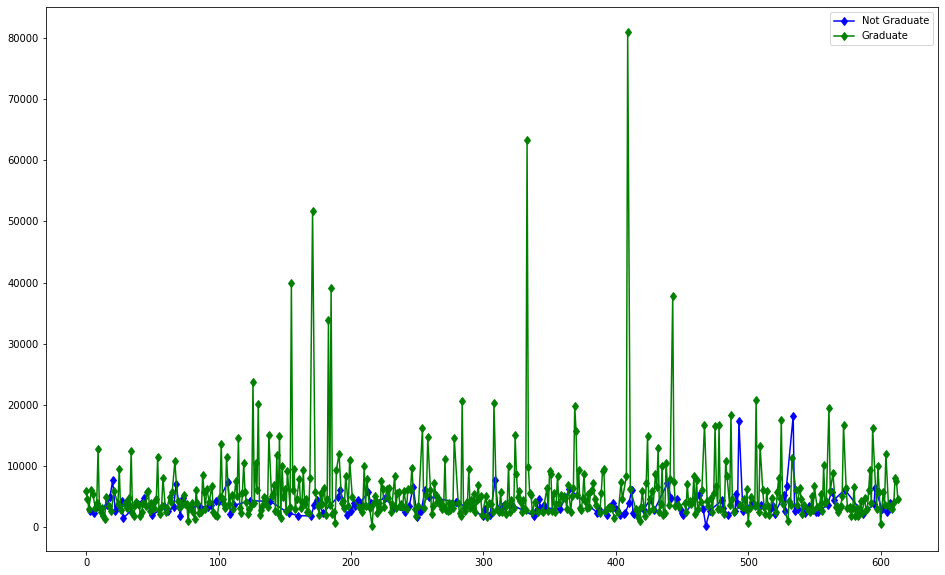

In [5]:
plt.figure(figsize=(16,10))
plot1=plt.plot(data.loc[data['Education'] == 'Not Graduate', 'ApplicantIncome'],label="Not Graduate",marker='d',color="blue")
plot2=plt.plot(data.loc[data['Education'] == 'Graduate', 'ApplicantIncome'],label="Graduate",marker='d',color="green")
plt.legend()

d:\python\python386\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

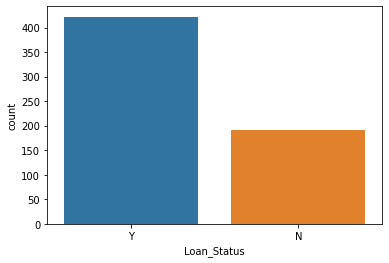

In [6]:
sns.countplot(data['Loan_Status'])

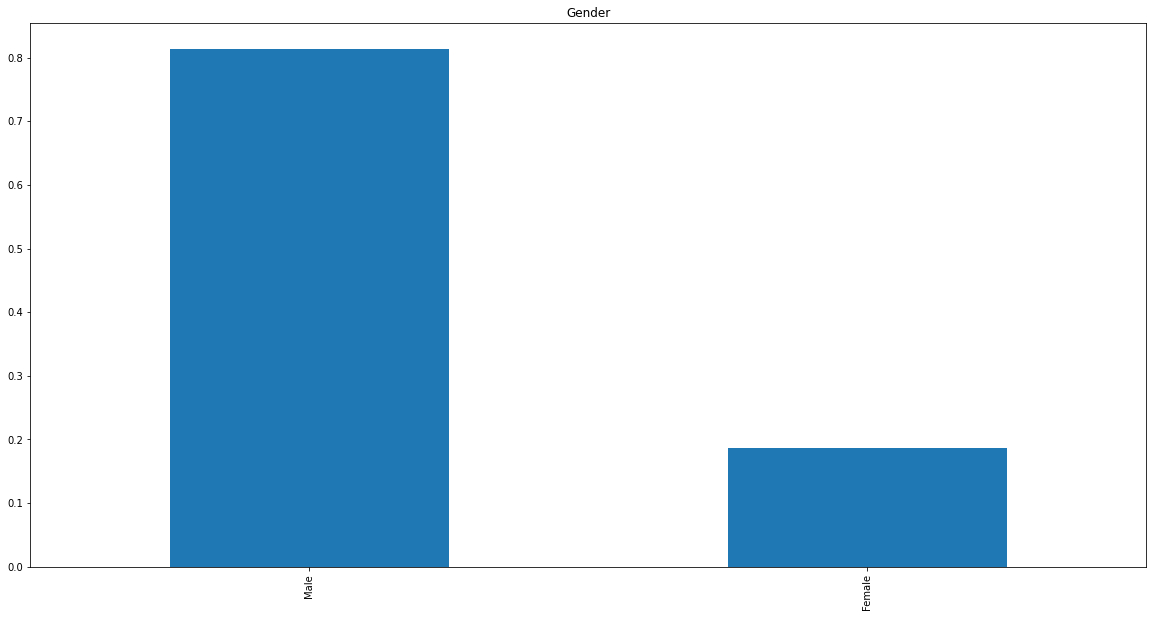

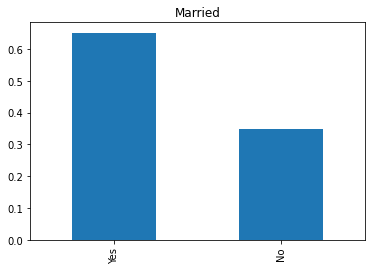

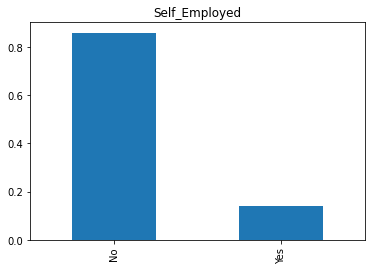

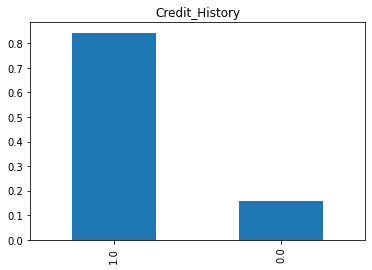

In [7]:
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()
data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

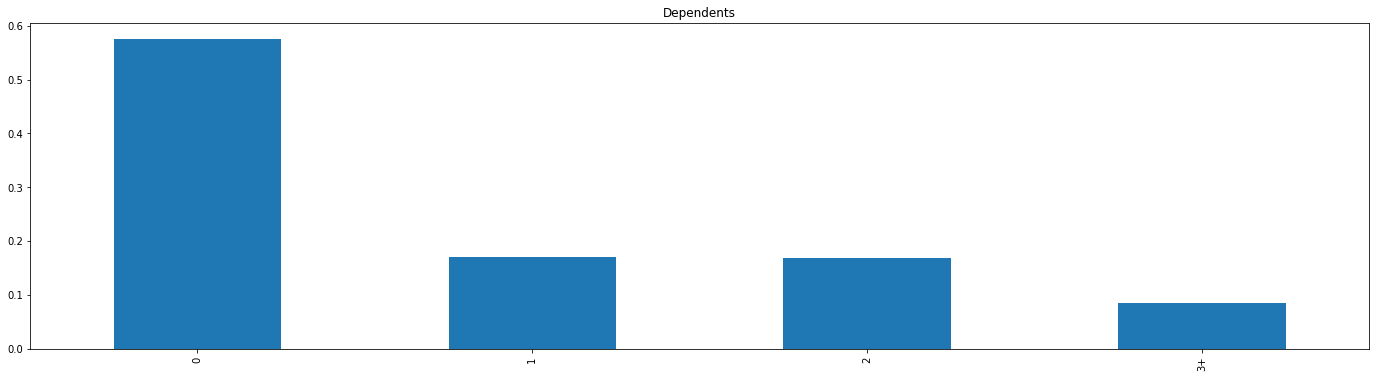

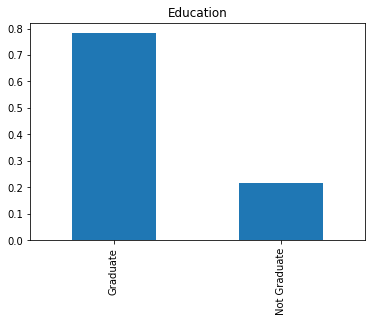

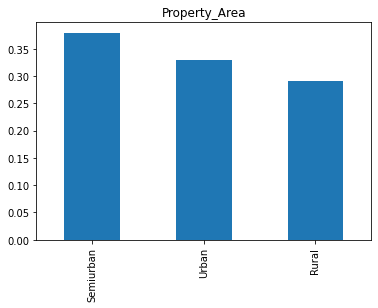

In [8]:
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

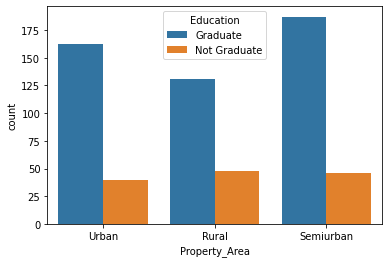

In [9]:
sns.countplot(x = data['Property_Area'], hue = data['Education'])

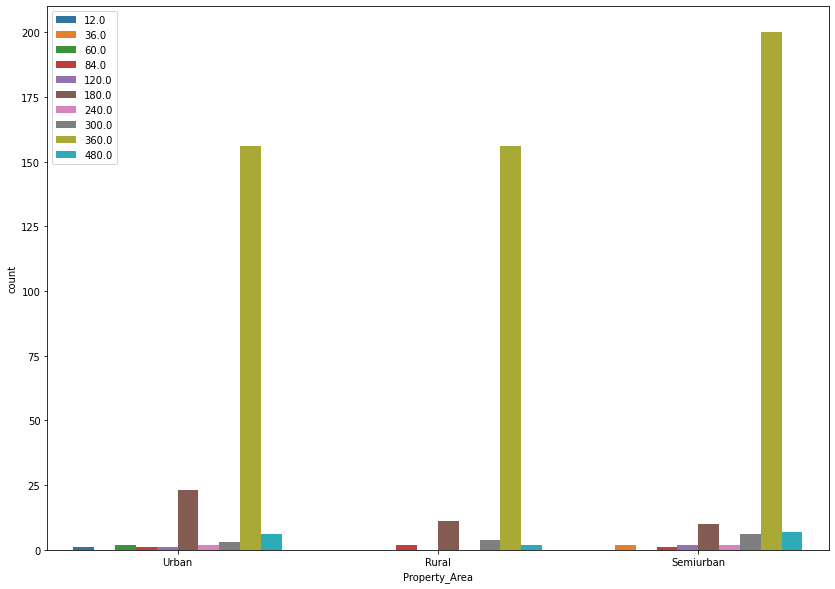

In [10]:
plt.figure(figsize=(14,10))
sns.countplot(x = data['Property_Area'], hue = data['Loan_Amount_Term'])
plt.legend(loc ="upper left")

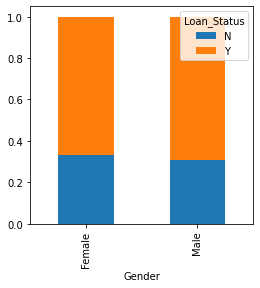

In [11]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

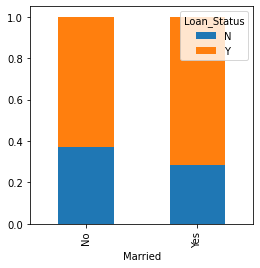

In [12]:
Married=pd.crosstab(data['Married'],data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

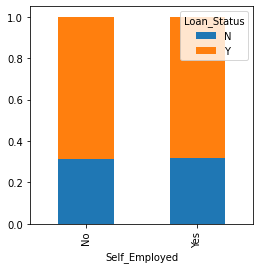

In [13]:
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

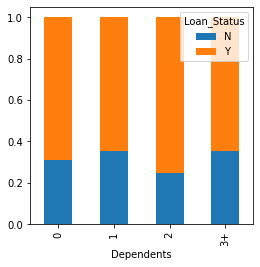

In [14]:
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

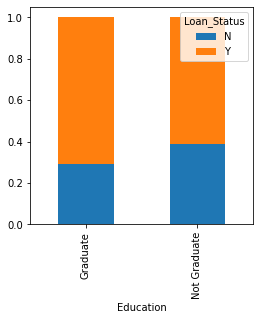

In [15]:
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

d:\python\python386\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\python\python386\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\python\python386\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

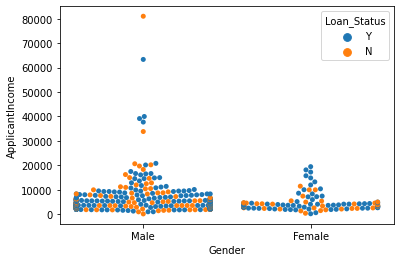

In [16]:
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

In [17]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## CLEANING DATA

In [18]:
data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [19]:
#counting number of missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [21]:
data.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [22]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
data=data.drop(['Loan_ID','Gender','Married','Self_Employed'],axis=1)
data

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Graduate,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,0,Graduate,2900,0.0,71.0,360.0,1.0,Rural,Y
610,3+,Graduate,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1,Graduate,8072,240.0,253.0,360.0,1.0,Urban,Y
612,2,Graduate,7583,0.0,187.0,360.0,1.0,Urban,Y


In [24]:
#label encoding
le = LabelEncoder()
data['Education'] = le.fit_transform(data['Education'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Dependents'] = le.fit_transform(data['Dependents'])

#### Education 
- 0 is graduate
- 1 is not graduate
#### Loan_Status
- 0 is N
- 1 is Y
#### Property_Area
- 0 is rural
- 1 is semiurban
- 2 is urban
#### Dependents
- 0 is 0
- 1 is 1
- 2 is 2
- 3 is 3+

In [25]:
data

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,0,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,3,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,2,0,7583,0.0,187.0,360.0,1.0,2,1


In [26]:
# divide data
x = data.iloc[:,:8].values
y = data.iloc[:,8:].values

In [27]:
#one hot encoding for Property Area and Dependents
one = OneHotEncoder()
dependents = one.fit_transform(x[:,:1]).toarray()
property = one.fit_transform(x[:,7:8]).toarray()

In [28]:
x = np.delete(x,0,axis=1)

In [29]:
x = np.delete(x,6,axis=1)

In [30]:
x = np.concatenate((x,dependents),axis=1)

In [31]:
x = np.concatenate((x,property),axis=1)
x.shape

(614, 13)

##### Education, Applicant Income, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, dependents(4), property(3)

#### dependants
- 0001 is 0
- 0010 is 1
- 0100 is 2
- 1000 is 3+

#### property
- 001 is rural
- 010 is semiurban
- 100 is urban

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
#standard scaling because classification
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## MODEL BUILDING


In [34]:
#Decision Tree
def decisionTree(x_train,x_test,y_train,y_test):
    dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
    dtc.fit(x_train,y_train)
    y_pred_dtc = dtc.predict(x_test)
    print("Decision Tree Classifer\n")
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred_dtc))
    print("Classification Report")
    print(classification_report(y_test,y_pred_dtc))
    print("Accuracy: ")
    print(accuracy_score(y_test,y_pred_dtc))

In [35]:
#Random Forest Classifier
def randomForest(x_train,x_test,y_train,y_test):
    rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    rfc.fit(x_train,y_train)
    y_pred_rfc = rfc.predict(x_test)
    print("Random Forest Classifer\n")
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred_rfc))
    print("Classification Report")
    print(classification_report(y_test,y_pred_rfc))
    print("Accuracy: ")
    print(accuracy_score(y_test,y_pred_rfc))

In [36]:
#KNeighbours Classifier
def KNN(x_train,x_test,y_train,y_test):
    knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    print("KNeighbours Classifer\n")
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred_knn))
    print("Classification Report")
    print(classification_report(y_test,y_pred_knn))
    print("Accuracy: ")
    print(accuracy_score(y_test,y_pred_knn))

In [37]:
#XGBoost Classifier
def xgboost(x_train,x_test,y_train,y_test):
    #tree = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
    #xg=xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric='mlogloss')
    #xg.fit(x_train,y_train.ravel())
    lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
    print("Gradient Boost Classifer\n")
    for learning_rate in lr_list:
        gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
        gb_clf.fit(x_train, y_train)

        print("Learning rate: ", learning_rate)
        print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
        print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))
    
   

In [38]:
#Comparing the models
randomForest(x_train,x_test,y_train,y_test)

Random Forest Classifer

Confusion Matrix
[[18 15]
 [14 76]]
Classification Report
              precision    recall  f1-score   support

           0       0.56      0.55      0.55        33
           1       0.84      0.84      0.84        90

    accuracy                           0.76       123
   macro avg       0.70      0.69      0.70       123
weighted avg       0.76      0.76      0.76       123

Accuracy: 
0.7642276422764228


C:\Users\Vaibhav Thalanki\AppData\Local\Temp\ipykernel_11072\1211179674.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


In [39]:
decisionTree(x_train,x_test,y_train,y_test)

Decision Tree Classifer

Confusion Matrix
[[22 11]
 [20 70]]
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        33
           1       0.86      0.78      0.82        90

    accuracy                           0.75       123
   macro avg       0.69      0.72      0.70       123
weighted avg       0.77      0.75      0.76       123

Accuracy: 
0.7479674796747967


In [40]:
KNN(x_train,x_test,y_train,y_test)

d:\python\python386\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighbours Classifer

Confusion Matrix
[[11 22]
 [ 9 81]]
Classification Report
              precision    recall  f1-score   support

           0       0.55      0.33      0.42        33
           1       0.79      0.90      0.84        90

    accuracy                           0.75       123
   macro avg       0.67      0.62      0.63       123
weighted avg       0.72      0.75      0.73       123

Accuracy: 
0.7479674796747967


In [41]:
xgboost(x_train,x_test,y_train,y_test)

Gradient Boost Classifer

Learning rate:  0.05
Accuracy score (training): 0.739
Accuracy score (validation): 0.772
Learning rate:  0.075
Accuracy score (training): 0.798
Accuracy score (validation): 0.805
Learning rate:  0.1
Accuracy score (training): 0.809
Accuracy score (validation): 0.829
Learning rate:  0.25
Accuracy score (training): 0.813
Accuracy score (validation): 0.821
Learning rate:  0.5
Accuracy score (training): 0.831
Accuracy score (validation): 0.821
Learning rate:  0.75
Accuracy score (training): 0.847
Accuracy score (validation): 0.764
Learning rate:  1
Accuracy score (training): 0.853
Accuracy score (validation): 0.772


d:\python\python386\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python\python386\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python\python386\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\python\python386\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [42]:
#Evaluating the model
from sklearn.model_selection import cross_val_score

#Random forest is selected
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
yPred=rf.predict(x_test)

f1_score(yPred,y_test,average='weighted')

C:\Users\Vaibhav Thalanki\AppData\Local\Temp\ipykernel_11072\3890709780.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.7894011977371655

In [43]:
cv=cross_val_score(rf,x,y,cv=5)

d:\python\python386\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\python\python386\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\python\python386\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\python\python386\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d a

In [44]:
np.mean(cv)

0.7817539650806344

In [45]:
#since xgboost has the highest accuracy we are going to export that model to pickle
#xg=xgb.XGBClassifier(objective="binary:logistic", random_state=42)
#xg.fit(x_train,y_train)
#y_pred_xg=xg.predict(x_test)


gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)

d:\python\python386\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print(accuracy_score(y_test,y_pred))

0.8292682926829268


In [47]:
pickle.dump(gb_clf,open("model.pkl","wb"))

In [48]:
pickle.dump(sc,open("scaler.pkl","wb"))